In [1]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

### **a) Calcule la correlación lineal entre estas dos variables y dibuje el diagrama de dispersión correspondiente. ¿La recta de regresión será de utilidad?**


Correlación entre Entrenamiento y Tiempo: -0.959746386006859



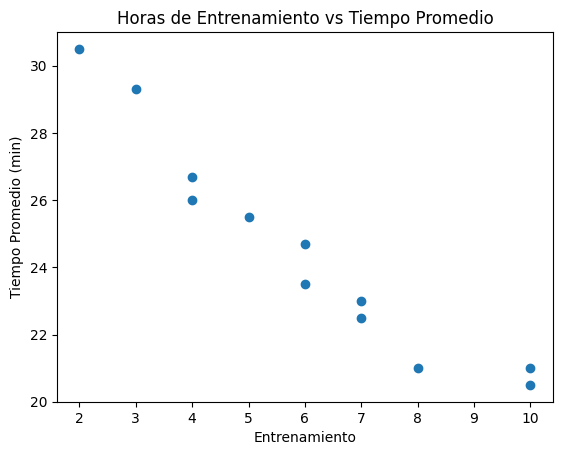

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
X = np.array([2, 3, 4, 4, 5, 6, 6, 7, 7, 8, 10, 10]) # horas de entrenamiento semanal
Y = np.array([30.5, 29.3, 26.7, 26.0, 25.5, 24.7, 23.5, 23.0, 22.5, 21.0, 21.0, 20.5]) # tiempo promedio del recorrido

# Calculo del coeficiente de correlación
correlacion = np.corrcoef(X, Y)[0, 1]
print(f'\nCorrelación entre Entrenamiento y Tiempo: {correlacion}\n')

# Diagrama de dispersión
plt.scatter(X, Y)
plt.xlabel('Entrenamiento')
plt.ylabel('Tiempo Promedio (min)')
plt.title('Horas de Entrenamiento vs Tiempo Promedio')
plt.show()

(12, 1)
Pesos de la Neurona:
  w = -1.0711524159563568
  b = 31.20629432910225


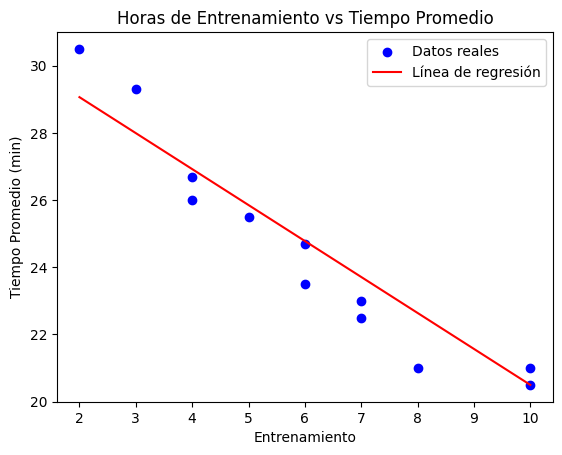

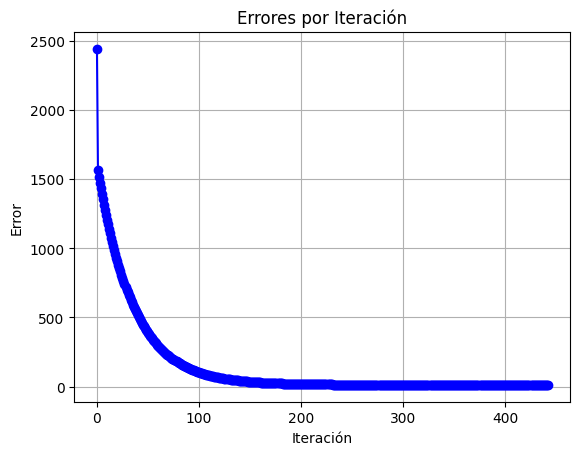

In [15]:
from ClassNeuronaLineal import NeuronaLineal

x_train = X.reshape(-1,1)    # selecciona entradas y formatea a Nx1
y_train = Y.reshape(-1,1)    # selecciona salidas y formatea a Nx1
print(x_train.shape)
# entrena neurona lineal y grafica
modelo = NeuronaLineal(alpha=0.01, n_iter=500, cotaE=0.001, draw=0, title=['Entrenamiento', 'Tiempo'])
modelo = modelo.fit(x_train, y_train)

# imprime pesos
print('Pesos de la Neurona:')
print('  w =', modelo.w_[0])
print('  b =', modelo.b_[0])

# Gráfico de los puntos originales
plt.scatter(x_train, y_train, color='blue', label='Datos reales')

# Graficar la línea de regresión ajustada
y_pred = modelo.predict(x_train)  # Predicciones del modelo
plt.plot(x_train, y_pred, color='red', label='Línea de regresión')

plt.xlabel('Entrenamiento')
plt.ylabel('Tiempo Promedio (min)')
plt.title('Horas de Entrenamiento vs Tiempo Promedio')
plt.legend()
plt.show()

# grafica errores
plt.plot(range(len(modelo.errors_)), [err[0] for err in modelo.errors_], marker='o', linestyle='-', color='b')
plt.title('Errores por Iteración')
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.grid(True)
plt.show()

### **b) Indique la ecuación del error cuadrático medio que se debería minimizar si se utilizara la técnica de descenso de gradiente.**

#   Error Cuadrático Medio  (Mean Square Error)



$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 \\
$$


Donde:

- $MSE$ es el Error Cuadrático Medio.
- $m$ es el número de observaciones o ejemplos del conjunto de datos.
- $y_i$ es el valor real (que intenta predecir el modelo) del ejemplo $i$.
- $\hat{y}_i$ es el valor predicho por el modelo para el ejemplo $i$.


